## PROJECT NAME :- FRAUD DETECTION
### Group 8:-
Sukaina Shoaib 23FA-049-SE 

Habiba Azfar 23FA-024-SE


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [ ]:
fraud= pd.read_csv('fraud_oracle.csv')
fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


###  Insurance Fraud Detection Dataset 

Each row represents an insurance claim record.  
This dataset includes customer demographics, vehicle details, policy information, claim details, and potential indicators of fraud.

####  Feature Descriptions:

- **Month**: Month in which the accident occurred.
- **WeekOfMonth**: Week of the month when the accident occurred (1 to 5).
- **DayOfWeek**: Day of the week when the accident occurred.
- **Make**: Manufacturer of the vehicle involved (e.g., Honda, Toyota).
- **AccidentArea**: Area where the accident occurred (`Urban` or `Rural`).
- **DayOfWeekClaimed**: Day on which the claim was filed.
- **MonthClaimed**: Month in which the claim was filed.
- **WeekOfMonthClaimed**: Week of the month in which the claim was filed.
- **Sex**: Gender of the policyholder (`Male` or `Female`).
- **MaritalStatus**: Marital status of the policyholder (`Single`, `Married`, etc.).
- **Age**: Age of the policyholder (numerical).
- **Fault**: Who was at fault (`Policy Holder` or `Third Party`).
- **PolicyType**: Combined info on vehicle and coverage type (e.g., `Sport - Liability`).
- **VehicleCategory**: Type of vehicle (e.g., `Sport`, `Sedan`).
- **VehiclePrice**: Estimated value of the vehicle (e.g., `more than 69000`, `20000 to 29000`).
- **FraudFound_P**: Target variable (`1` = Fraudulent claim, `0` = Legitimate claim).
- **PolicyNumber**: Unique ID for the insurance policy.
- **RepNumber**: Unique ID of the representative handling the claim.
- **Deductible**: Deductible amount on the policy.
- **DriverRating**: Rating of the driver (1 to 4).
- **Days_Policy_Accident**: Days since policy was taken before the accident.
- **Days_Policy_Claim**: Days since policy was taken before the claim was filed.
- **PastNumberOfClaims**: Number of previous claims filed.
- **AgeOfVehicle**: Age of the vehicle (e.g., `3 years`, `7 years`, `more than 7`).
- **AgeOfPolicyHolder**: Age range of the policyholder (e.g., `26 to 30`, `41 to 50`).
- **PoliceReportFiled**: Was a police report filed? (`Yes` or `No`).
- **WitnessPresent**: Was a witness present? (`Yes` or `No`).
- **AgentType**: Type of agent (`External` or `Internal`).
- **NumberOfSuppliments**: Number of supplemental documents (e.g., `none`, `more than 5`).
- **AddressChange_Claim**: Time since last address change (e.g., `no change`, `1 year`).
- **NumberOfCars**: Number of cars insured (e.g., `1 vehicle`, `3 to 4`).
- **Year**: Year of the record (e.g., `1994`).
- **BasePolicy**: Base insurance policy type (`Liability`, `Collision`, etc.).



In [ ]:
fraud.tail()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


Categorical: Month, DayOfWeek, Make, PolicyType, VehicleCategory, MonthClaimed, DayOfWeekClaimed, MaritalStatus, AgentType, BasePolicy

Ordinal: WeekOfMonth, WeekOfMonthClaimed, DriverRating, VehiclePrice, Days_Policy_Accident, Days_Policy_Claim, PastNumberOfClaims, AgeOfVehicle, AgeOfPolicyHolder, NumberOfSuppliments, AddressChange_Claim, NumberOfCars

Binary: Sex, AccidentArea, Fault, PoliceReportFiled, WitnessPresent, FraudFound_P

Numerical: Age, Deductible, Year

Identifiers (not used for prediction): PolicyNumber, RepNumber

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

The dataset contains 15,420 entries and 33 features. It includes 9 integer-type columns and 24 categorical (object-type) columns. All columns are complete with no missing values.


In [ ]:
fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [ ]:
fraud.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


### Dataset Insights:

- **WeekOfMonth** ranges from 1 to 5, with a mean of 2.79, indicating a relatively even distribution across the weeks of the month.
- **WeekOfMonthClaimed** has a similar distribution with a mean of 2.69.
- **Age** varies from 0 to 80 years, with a mean of 39.86 years, showing a broad age range of policyholders.
- **FraudFound_P** is binary (0 or 1), and the mean is 0.06, indicating that most claims are non-fraudulent.
- **PolicyNumber** ranges from 1 to 15,420, with a mean of 7,710, indicating a diverse set of policies.
- **RepNumber** ranges from 1 to 16, with a mean of 8.48, showing a variety of representatives handling the policies.
- **Deductible** varies from 300 to 700, with a mean of 407.7, indicating a range of deductible values across policies.
- **DriverRating** ranges from 1 to 4, with a mean of 2.49, suggesting a balance of driver ratings.
- **Year** ranges from 1994 to 1996, with a mean of 1994.87, showing that the data is from a short span of three years.

### Summary:

The dataset consists of 15,420 entries with a wide range of **ages** (from 0 to 80 years). Most entries are from non-fraudulent claims, with only 6% of claims flagged as fraudulent. The **policy** numbers and **representative numbers** show significant variety, reflecting a large number of different policies and representatives. The **deductible** values and **driver ratings** show moderate variability, while the dataset spans **policy years** from 1994 to 1996.


In [ ]:
fraud.shape

(15420, 33)

We have 15420 observations, each with 33 attributes out of which 32 are features and fraudFound_p is the target column.

In [ ]:
fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [ ]:
fraud.mean(numeric_only=True)

WeekOfMonth              2.788586
WeekOfMonthClaimed       2.693969
Age                     39.855707
FraudFound_P             0.059857
PolicyNumber          7710.500000
RepNumber                8.483268
Deductible             407.704280
DriverRating             2.487808
Year                  1994.866472
dtype: float64

# Exploratory Data Analysis

This is a necessary step to gauge the quality of the data. First, we need to check the value counts in the target column to make sure they aren't skewed towards one result.

In [ ]:
fraud['FraudFound_P'].value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

### Fraud Found = 1
### Fraud Not Found = 0

This indicates a relatively unbalanced dataset, with a minority of fraud detection cases, which is not suitable for training we need major resampling techniques.

In [ ]:
fraud.groupby('FraudFound_P').mean(numeric_only=True)

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
FraudFound_P,,,,,,,,
0,2.792440,2.695799,39.956957,7733.351038,8.492033,407.511899,2.485756,1994.871491
1,2.728061,2.665222,38.265439,7351.592633,8.345612,410.725894,2.520043,1994.787649



### Insight:

- The average `WeekOfMonth`, `WeekOfMonthClaimed`, `Age`, `PolicyNumber`, `RepNumber`, `Deductible`, `DriverRating`, and `Year` for individuals with no fraud (FraudFound_P = 0) are slightly higher compared to individuals with fraud found (FraudFound_P = 1). 
- The key difference between the two groups indicates that people without fraud claims tend to be slightly older and have higher deductibles and driver ratings. 
- Fraud seems to be slightly more common in individuals with lower driver ratings and policy numbers.


In [ ]:
fraud.corr(numeric_only=True)

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275400,-0.004810,-0.011861,-0.007797,0.005283,-0.003993,-0.016817,-0.003906
WeekOfMonthClaimed,0.275400,1.000000,0.001859,-0.005761,0.011665,0.008908,0.005457,-0.000048,0.012175
Age,-0.004810,0.001859,1.000000,-0.029741,0.025944,-0.007063,0.069420,0.001668,0.025197
FraudFound_P,-0.011861,-0.005761,-0.029741,1.000000,-0.020345,-0.007551,0.017348,0.007266,-0.024760
PolicyNumber,-0.007797,0.011665,0.025944,-0.020345,1.000000,0.008990,0.002133,-0.012312,0.936513
RepNumber,0.005283,0.008908,-0.007063,-0.007551,0.008990,1.000000,0.000509,0.011031,0.009338
Deductible,-0.003993,0.005457,0.069420,0.017348,0.002133,0.000509,1.000000,0.003886,-0.001170
DriverRating,-0.016817,-0.000048,0.001668,0.007266,-0.012312,0.011031,0.003886,1.000000,-0.013890
Year,-0.003906,0.012175,0.025197,-0.024760,0.936513,0.009338,-0.001170,-0.013890,1.000000


### Insight:

The correlation matrix reveals the following insights:

- **WeekOfMonth** and **WeekOfMonthClaimed** show a moderate positive correlation (0.28), indicating a slight relationship between the week of the month of the event and the claimed week.
- **PolicyNumber** is strongly correlated with **Year** (0.94), suggesting that the policy number increases with the year of policy issuance.
- **Age** and **FraudFound_P** show very weak negative correlations, meaning that age has little to no impact on fraud detection in this dataset.
- Features like **Deductible**, **DriverRating**, and **RepNumber** show very weak correlations with the target variable, **FraudFound_P**.
- Based on this analysis, columns such as **RepNumber**, **DriverRating**, and **Deductible** show minimal relationship with fraud detection and could potentially be dropped in future model simplifications.

It is recommended to further test the model performance both before and after removing these columns to validate their impact.


# ulticollinearity

<Axes: >

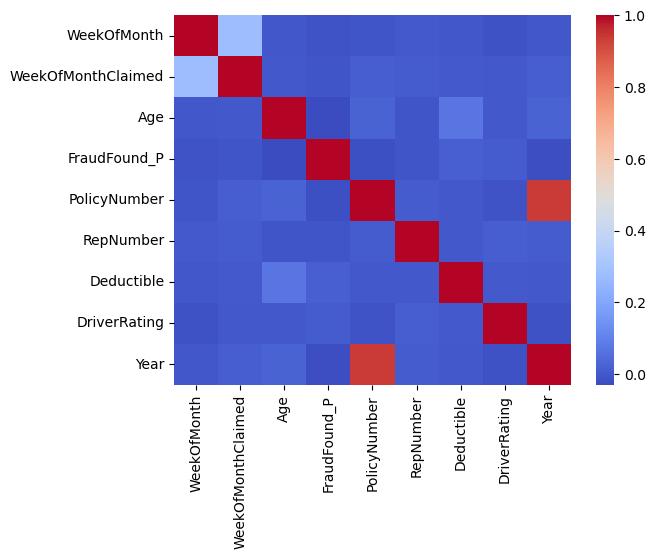

In [ ]:
sns.heatmap(fraud.corr(numeric_only=True), cmap='coolwarm')

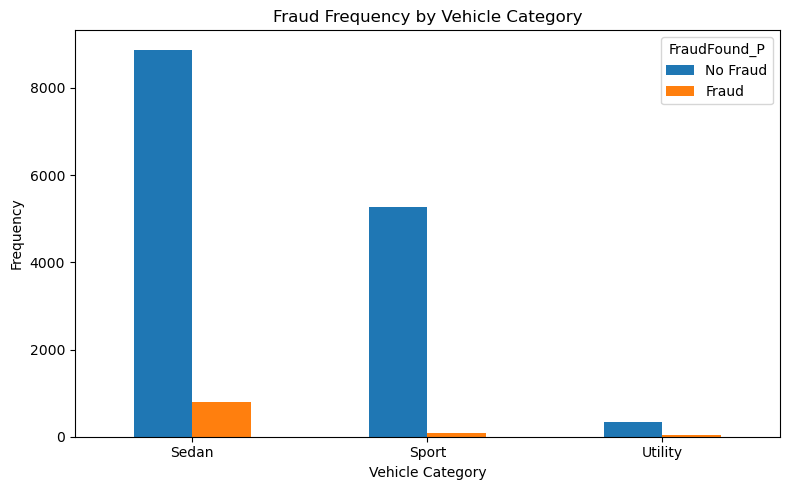

In [ ]:

# Bar chart: Fraud frequency by Vehicle Category
pd.crosstab(fraud['VehicleCategory'], fraud['FraudFound_P']).plot(kind='bar', figsize=(8, 5))
plt.title('Fraud Frequency by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(["No Fraud", "Fraud"], title="FraudFound_P")
plt.tight_layout()
plt.show()


Observation: Sedans have the highest fraud frequency, while sports vehicles show the lowest. Utility vehicles have fewer cases but a relatively higher fraud proportion than sports.

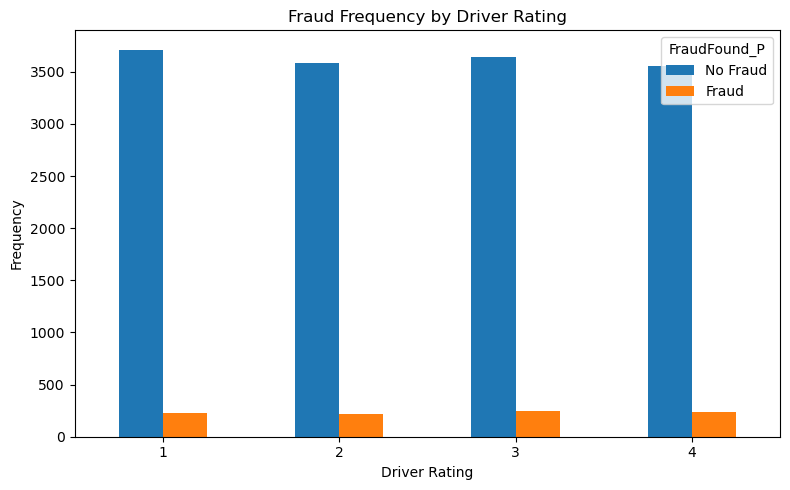

In [ ]:
# Bar chart: Fraud frequency by Driver Rating
pd.crosstab(fraud['DriverRating'], fraud['FraudFound_P']).plot(kind='bar', figsize=(8, 5))
plt.title('Fraud Frequency by Driver Rating')
plt.xlabel('Driver Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(["No Fraud", "Fraud"], title="FraudFound_P")
plt.tight_layout()
plt.show()


Observation:

Fraud is not heavily influenced by driver rating alone, or driver rating is not a strong predictor of fraud.
The data might be imbalanced with far more non-fraud cases than fraud cases, which is typical in fraud detection datasets.

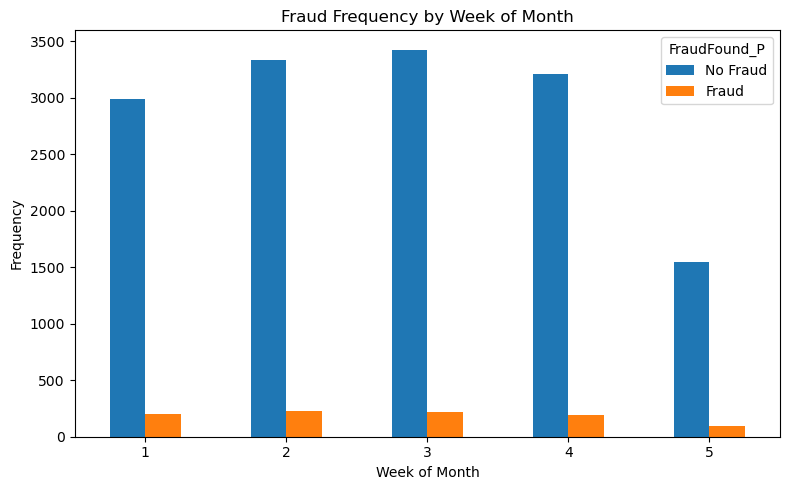

In [ ]:
# Bar chart: Fraud frequency by Week of Month
pd.crosstab(fraud['WeekOfMonth'], fraud['FraudFound_P']).plot(kind='bar', figsize=(8, 5))
plt.title('Fraud Frequency by Week of Month')
plt.xlabel('Week of Month')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(["No Fraud", "Fraud"], title="FraudFound_P")
plt.tight_layout()
plt.show()


observation:- Fraud cases remain consistently low across all weeks of the month, with slightly higher activity in Weeks 1 to 4 and a noticeable drop in Week 5, likely due to fewer data entries.

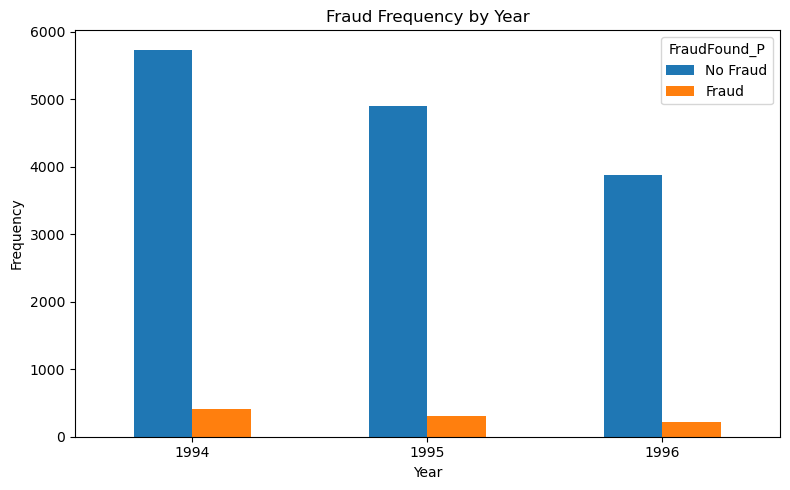

In [ ]:
# Bar chart: Fraud frequency by Year
pd.crosstab(fraud['Year'], fraud['FraudFound_P']).plot(kind='bar', figsize=(8, 5))
plt.title('Fraud Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(["No Fraud", "Fraud"], title="FraudFound_P")
plt.tight_layout()
plt.show()


observation:-
Fraud cases slightly decrease from 1994 to 1996, while non-fraud cases show a significant decline each year.

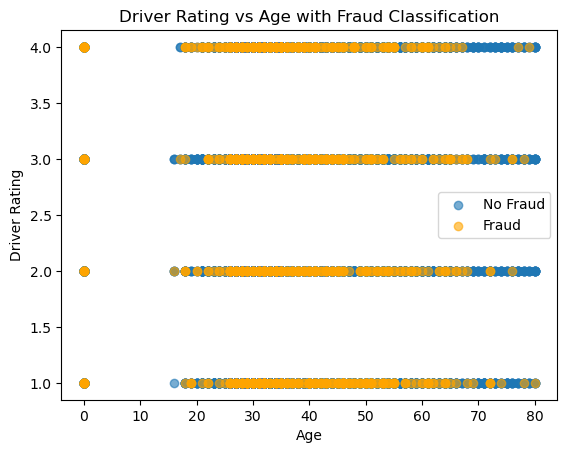

In [ ]:
# No fraud (FraudFound_P = 0)
plt.scatter(
    x=fraud['Age'][fraud['FraudFound_P'] == 0],
    y=fraud['DriverRating'][fraud['FraudFound_P'] == 0],
    label='No Fraud',
    alpha=0.6
)

# Fraud (FraudFound_P = 1)
plt.scatter(
    x=fraud['Age'][fraud['FraudFound_P'] == 1],
    y=fraud['DriverRating'][fraud['FraudFound_P'] == 1],
    c='orange',
    label='Fraud',
    alpha=0.6
)

# Labels and legend
plt.xlabel("Age")
plt.ylabel("Driver Rating")
plt.title("Driver Rating vs Age with Fraud Classification")
plt.legend()
plt.show()



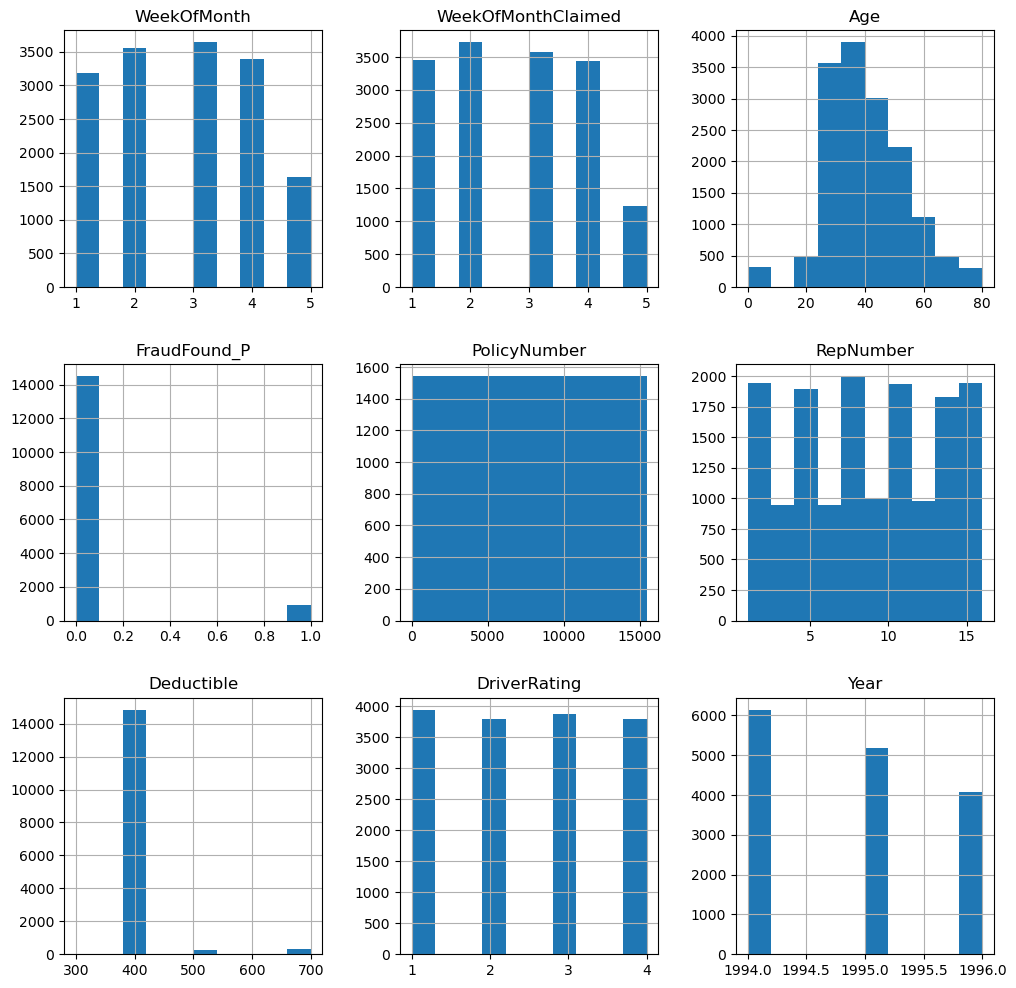

In [ ]:
fraud.hist(figsize = (12, 12))
plt.show()

In [ ]:
fraud["WeekOfMonth"].value_counts()

WeekOfMonth
3    3640
2    3558
4    3398
1    3187
5    1637
Name: count, dtype: int64

In [ ]:
fraud["WeekOfMonthClaimed"].value_counts()

WeekOfMonthClaimed
2    3720
3    3583
1    3450
4    3433
5    1234
Name: count, dtype: int64

In [ ]:
fraud["Age"].value_counts()

Age
30    596
33    574
34    573
35    569
28    560
     ... 
20     28
70     27
79     20
16      9
17      6
Name: count, Length: 66, dtype: int64

In [ ]:
fraud["DriverRating"].value_counts()

DriverRating
1    3944
3    3884
2    3801
4    3791
Name: count, dtype: int64

In [ ]:
fraud["PolicyNumber"].value_counts()

PolicyNumber
1        1
10361    1
10273    1
10274    1
10275    1
        ..
5145     1
5146     1
5147     1
5148     1
15420    1
Name: count, Length: 15420, dtype: int64

In [ ]:
fraud["Deductible"].value_counts()

Deductible
400    14838
700      311
500      263
300        8
Name: count, dtype: int64

In [ ]:
fraud["Year"].value_counts()

Year
1994    6142
1995    5195
1996    4083
Name: count, dtype: int64

# Data Preprocessing

# Missing Data Handling 

In [ ]:
fraud.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [ ]:
missing_summary=fraud.isnull().sum()
missing_columns = missing_summary[missing_summary > 0]

if not missing_columns.empty:
    print("After checking, the following columns have missing values:\n")
    print(missing_columns)
else:
    print("No columns with missing values were found.")


No columns with missing values were found.


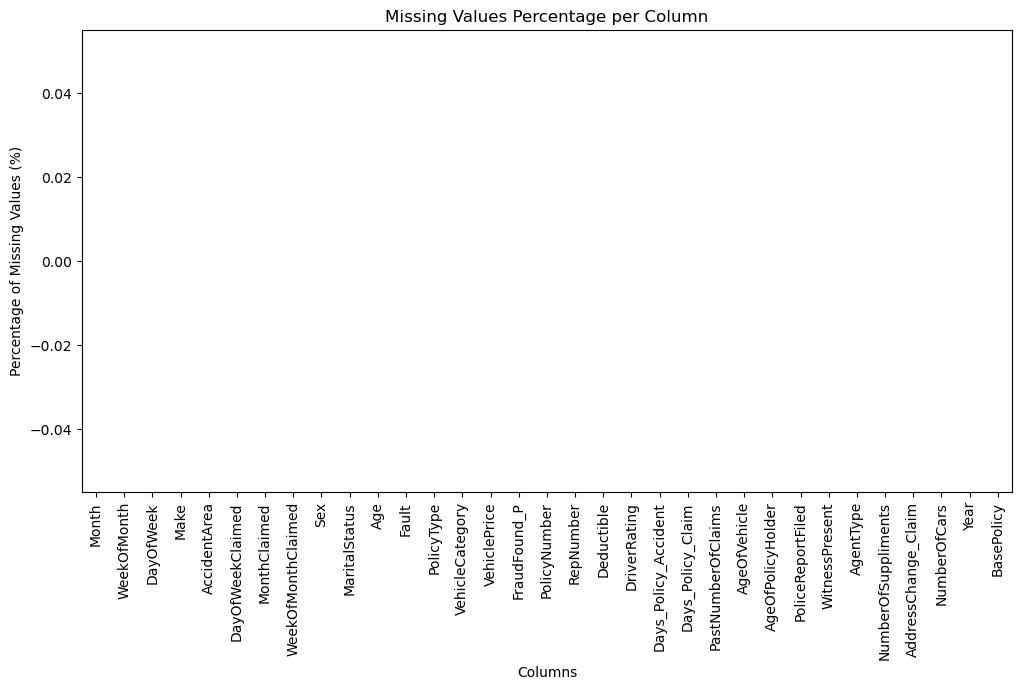

In [ ]:
missing_percentage = fraud.isnull().mean() * 100

plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title("Missing Values Percentage per Column")
plt.ylabel("Percentage of Missing Values (%)")
plt.xlabel("Columns")
plt.show()

Observation:- This graph shows that there are no missing values

# String to Int conversion of categorical column

## By using Label Encoder 

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
object_cols = fraud.select_dtypes(include='object').columns  # Select only object dtype columns

for col in object_cols:
    le = LabelEncoder()
    fraud[col] = le.fit_transform(fraud[col].astype(str))
    label_encoders[col] = le  # Save the encoder for possible inverse transformation

fraud.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,6,5,1,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,2,5,4,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,5,10,2,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,1,6,1,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,6,4,2,0,2,...,3,4,0,0,0,3,3,0,1994,1


# Check For Outliers 

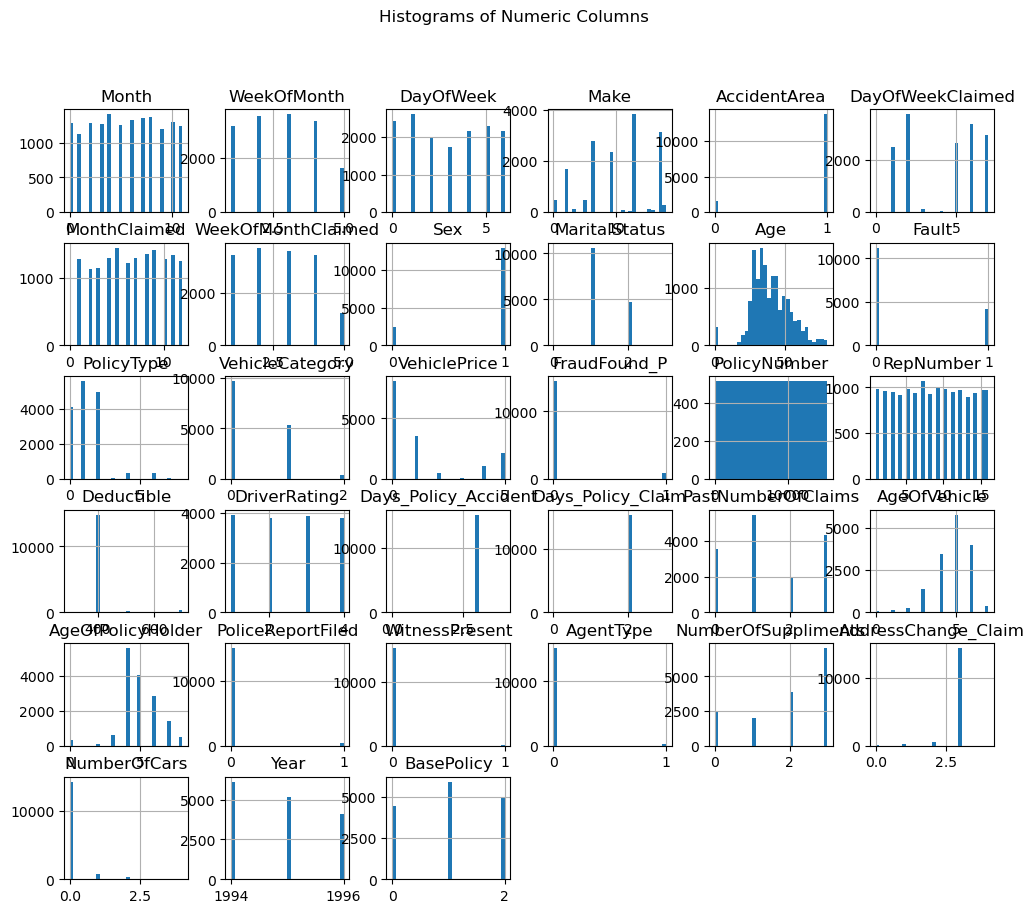

In [ ]:
fraud.select_dtypes(include=[np.number]).hist(bins=30, figsize=(12, 10))
plt.suptitle("Histograms of Numeric Columns")
plt.show()

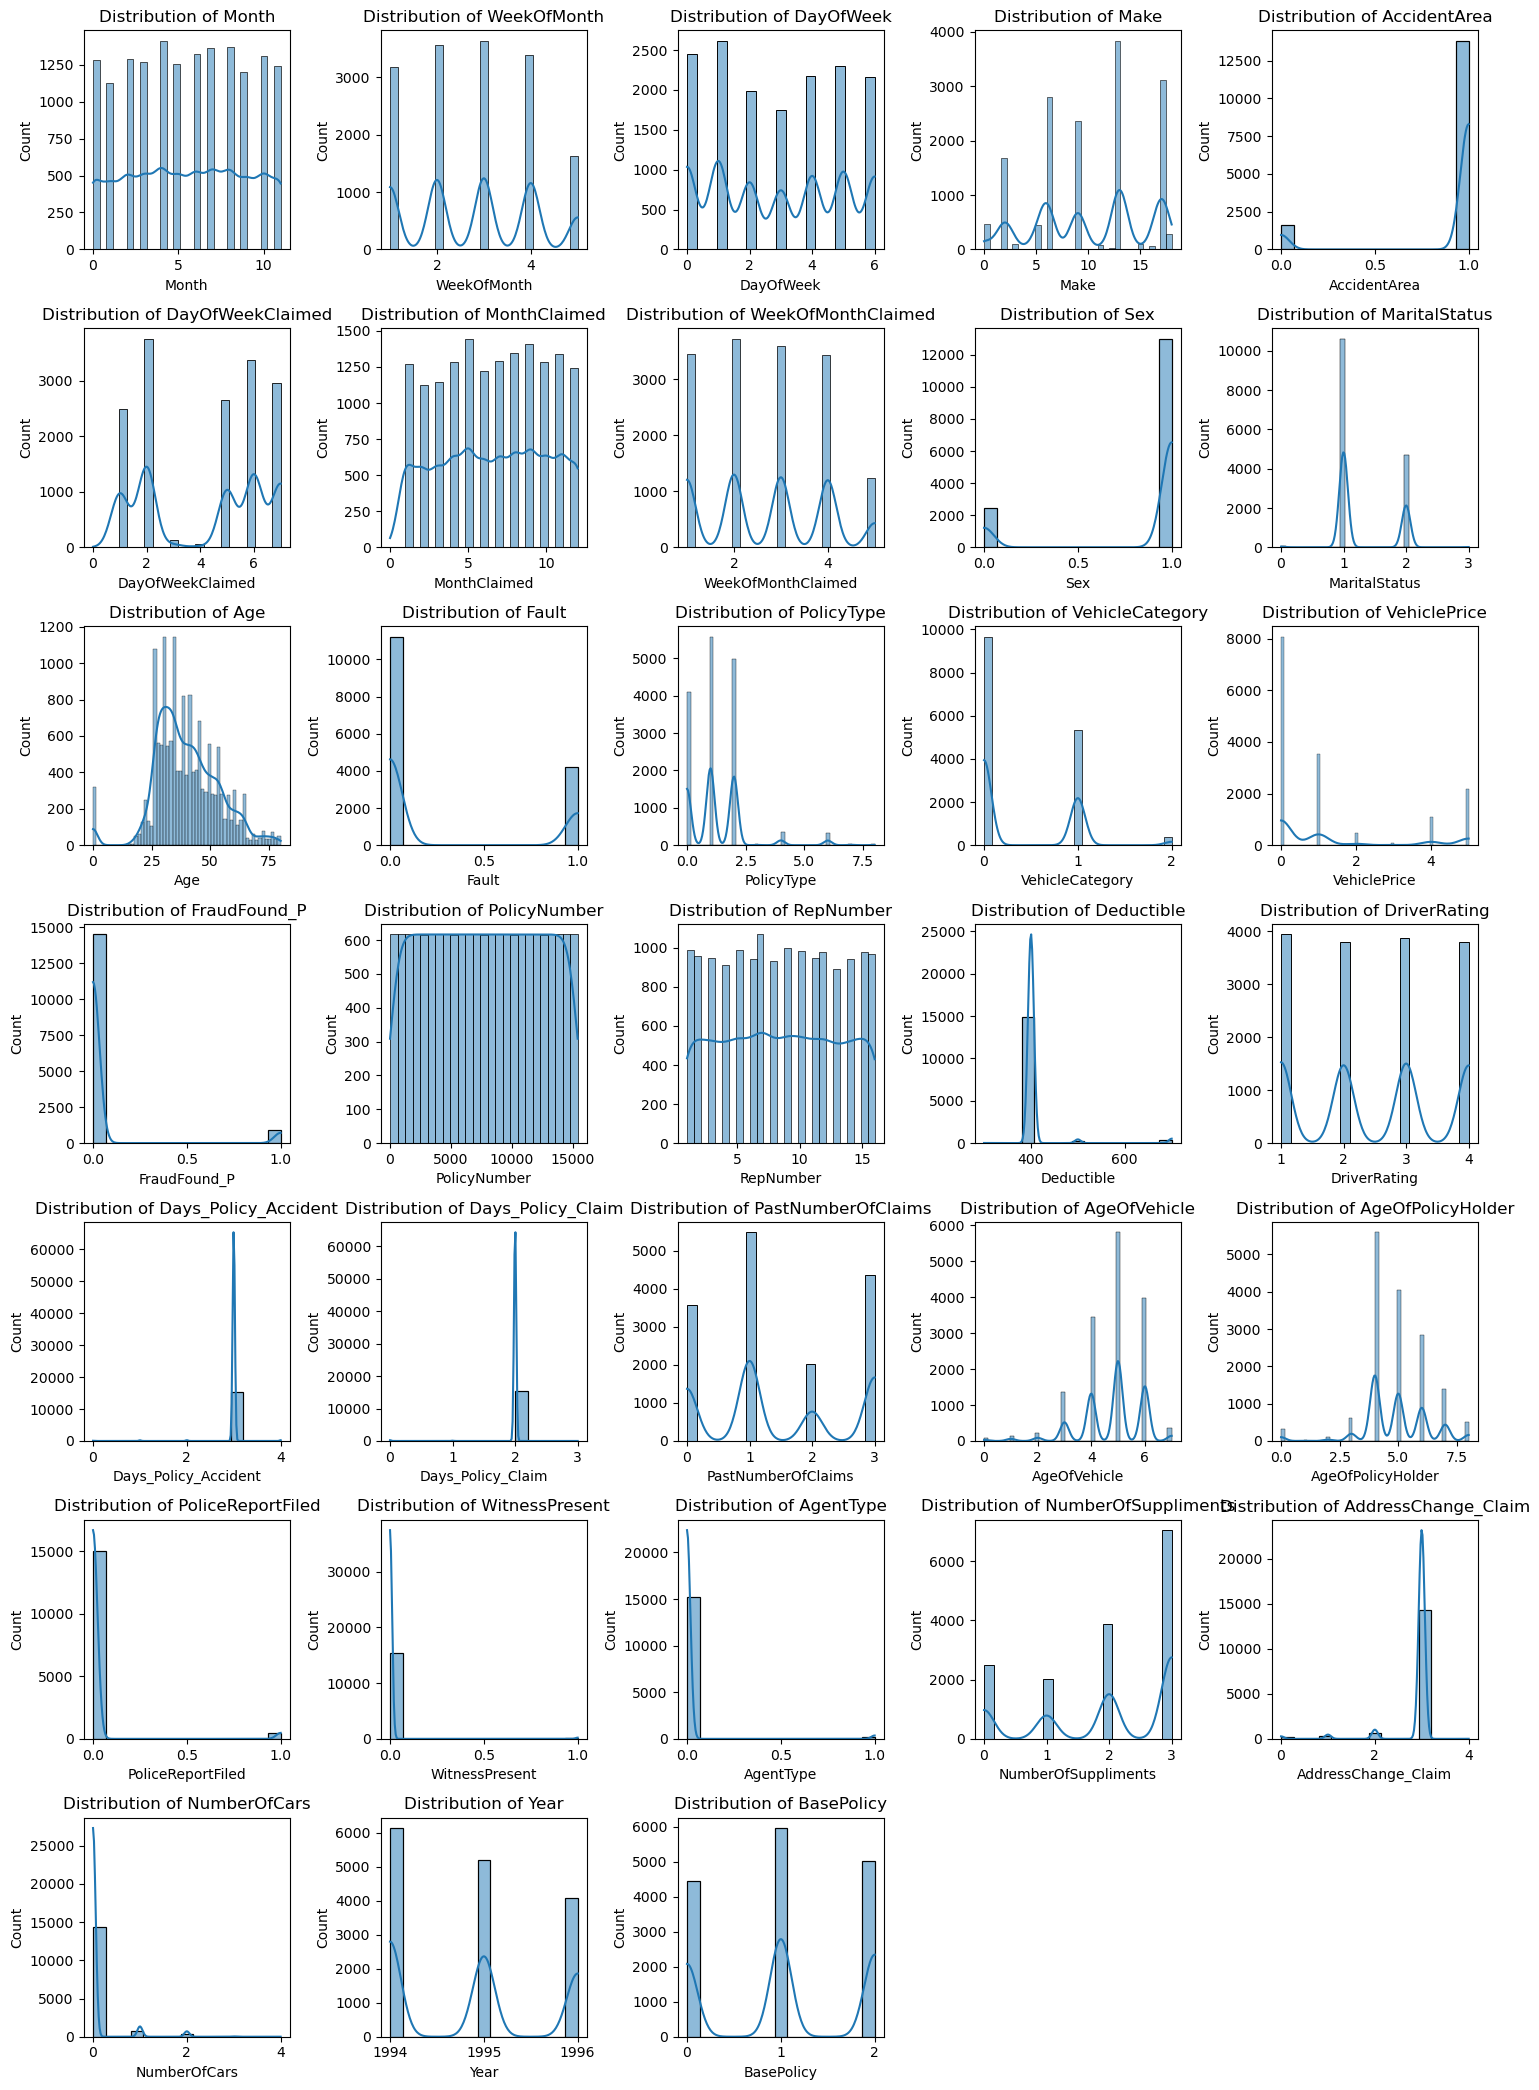

In [ ]:
num_cols = len(fraud.select_dtypes(include=[np.number]).columns)

# Calculate rows and columns for the grid
ncols = 5  # you can change this
nrows = int(np.ceil(num_cols / ncols))  # Ceiling to get enough rows

# Create subplots dynamically based on the number of columns
plt.figure(figsize=(ncols * 3, nrows * 3))

# Loop through the numeric columns and create a subplot for each
for i, col in enumerate(fraud.select_dtypes(include=[np.number]).columns):
    plt.subplot(nrows, ncols, i + 1)  # Adjust to grid
    sns.histplot(fraud[col], kde=True)  # Plot histogram with KDE
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


Observation:- Graph is non Guassian . For solving outliers we are using IQR method

# IQR Method (for Non-Gaussian Data)

In [ ]:
# Calculate IQR for each numeric column
Q1 = fraud.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = fraud.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = ((fraud.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | 
                (fraud.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))

# Count outliers in each column
outliers_count_iqr = outliers_iqr.sum()

# Show outliers count for each column
outliers_count_iqr_df = pd.DataFrame(outliers_count_iqr, index=fraud.select_dtypes(include=[np.number]).columns, columns=["Outliers Count"])
print(outliers_count_iqr_df)


                      Outliers Count
Month                              0
WeekOfMonth                        0
DayOfWeek                          0
Make                               0
AccidentArea                    1598
DayOfWeekClaimed                   0
MonthClaimed                       0
WeekOfMonthClaimed                 0
Sex                             2420
MaritalStatus                      0
Age                              547
Fault                              0
PolicyType                       391
VehicleCategory                    0
VehiclePrice                    3347
FraudFound_P                     923
PolicyNumber                       0
RepNumber                          0
Deductible                       582
DriverRating                       0
Days_Policy_Accident             173
Days_Policy_Claim                 78
PastNumberOfClaims                 0
AgeOfVehicle                      73
AgeOfPolicyHolder                320
PoliceReportFiled                428
W

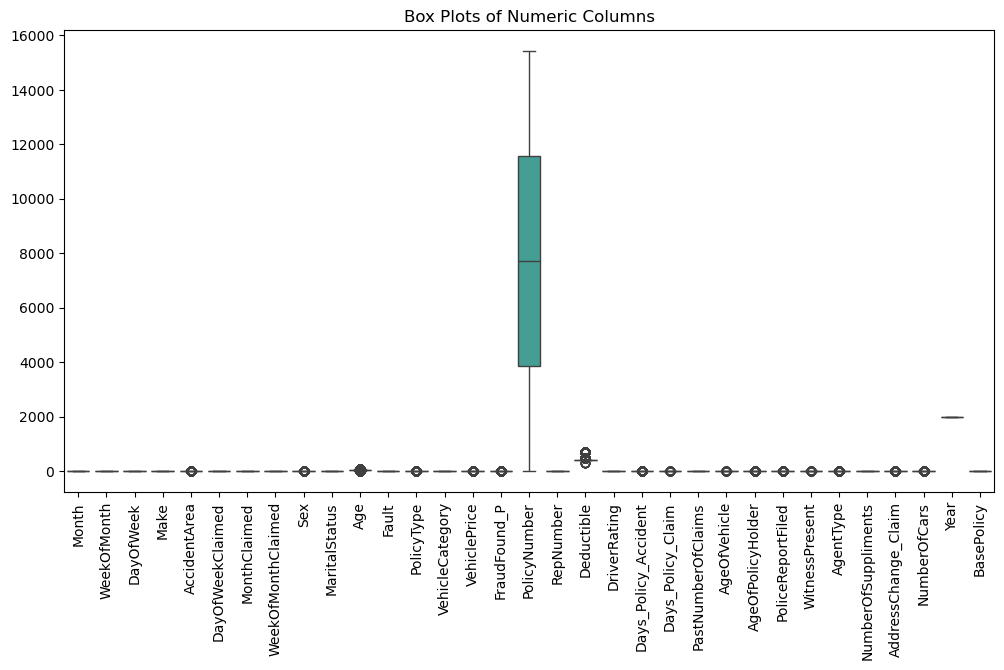

In [ ]:
# Box plots for each numeric column
plt.figure(figsize=(12, 6))
sns.boxplot(data=fraud.select_dtypes(include=[np.number]))
plt.title("Box Plots of Numeric Columns")
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
scaler=StandardScaler()
scaled = scaler.fit_transform(fraud)

In [ ]:
# Calculate IQR for each numeric column
Q1 = fraud.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = fraud.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = ((fraud.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | 
                (fraud.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))

# Count outliers in each column
outliers_count_iqr = outliers_iqr.sum()

# Show outliers count for each column
outliers_count_iqr_df = pd.DataFrame(outliers_count_iqr, index=fraud.select_dtypes(include=[np.number]).columns, columns=["Outliers Count"])
print(outliers_count_iqr_df)

                      Outliers Count
Month                              0
WeekOfMonth                        0
DayOfWeek                          0
Make                               0
AccidentArea                    1598
DayOfWeekClaimed                   0
MonthClaimed                       0
WeekOfMonthClaimed                 0
Sex                             2420
MaritalStatus                      0
Age                              547
Fault                              0
PolicyType                       391
VehicleCategory                    0
VehiclePrice                    3347
FraudFound_P                     923
PolicyNumber                       0
RepNumber                          0
Deductible                       582
DriverRating                       0
Days_Policy_Accident             173
Days_Policy_Claim                 78
PastNumberOfClaims                 0
AgeOfVehicle                      73
AgeOfPolicyHolder                320
PoliceReportFiled                428
W

In [ ]:
fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,6,5,1,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,2,5,4,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,5,10,2,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,1,6,1,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,6,4,2,0,2,...,3,4,0,0,0,3,3,0,1994,1


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer

# Automatically identify numeric feature columns (excluding target)
numeric_features = fraud.select_dtypes(include=['number']).columns.tolist()

# Scalers to apply
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(output_distribution='normal')
}

# Dictionary to hold scaled DataFrames
scaled_data = {}
for name, scaler in scalers.items():
    scaled = scaler.fit_transform(fraud[numeric_features])
    scaled_data[name] = pd.DataFrame(scaled, columns=numeric_features)

# (Optional) View one of the scaled datasets
scaled_data["StandardScaler"].head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,-1.035963,1.717545,1.500542,-0.778873,0.340019,0.790376,-0.467838,-1.345408,-2.317736,1.466229,...,-3.332212,-1.355359,-0.168963,-0.075326,-0.126005,0.897371,-6.403760,4.957931,-1.078658,1.231812
1,-0.449364,0.164199,1.500542,-0.778873,0.340019,-0.968740,-0.467838,1.037295,0.431455,1.466229,...,-0.701024,-0.638956,5.918449,-0.075326,-0.126005,0.897371,0.247144,-0.257739,-1.078658,-0.046421
2,1.310432,1.717545,-1.418572,-0.778873,0.340019,0.350597,0.998077,-0.551174,0.431455,-0.638524,...,0.176038,0.793851,-0.168963,-0.075326,-0.126005,0.897371,0.247144,-0.257739,-1.078658,-0.046421
3,0.137234,-0.612473,-0.445534,1.303376,-2.941014,-1.408519,-0.174655,-1.345408,0.431455,-0.638524,...,1.053101,1.510255,5.918449,-0.075326,-0.126005,-0.003036,0.247144,-0.257739,-1.078658,1.231812
4,-0.449364,1.717545,-0.932053,-0.778873,0.340019,0.790376,-0.761021,-0.551174,-2.317736,1.466229,...,-1.578087,-0.638956,-0.168963,-0.075326,-0.126005,0.897371,0.247144,-0.257739,-1.078658,-0.046421


# Feature Reduction:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca_components = pca.fit_transform(fraud.iloc[:, :-1])
pca_df = pd.DataFrame(pca_components, columns=[f"PCA_{i}" for i in range(1, 11)])
pca_df.head(10)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,-7709.503972,-107.955289,-16.041142,-3.743069,2.682846,-4.079651,2.970213,2.155751,3.583492,1.571618
1,-7708.500753,-7.674382,-5.298546,-4.145472,5.975455,-3.408704,-0.850152,3.609911,3.900463,0.219819
2,-7707.499605,-7.364488,7.923430,-4.333287,0.030938,5.904832,-0.240435,-3.055680,3.941134,-0.722147
3,-7706.498078,-6.912499,26.182904,6.522836,-4.254338,0.917083,-3.396330,0.406565,-0.429368,-0.716685
4,-7705.501441,-7.844807,-12.266974,-4.056081,-5.882244,-1.303993,0.962595,-2.506759,3.623864,-0.722775
5,-7704.501715,-8.013953,-19.387043,-3.755146,4.820180,4.874848,1.667408,-3.684206,3.684740,-0.790543
6,-7703.500623,-7.626606,-3.158938,-4.217339,4.672719,-4.563796,-2.412014,0.025632,3.715903,0.086855
7,-7702.503452,-8.481319,-39.318885,-3.516710,-6.385405,5.477623,0.665110,-3.314410,4.194950,-1.368593
8,-7701.501219,-7.770172,-9.255345,-4.146573,-2.476216,-4.306139,2.224970,-1.990924,3.669681,-0.102735
9,-7700.500350,-7.481058,2.820296,-5.545524,-3.143291,-7.166742,3.262098,0.859570,4.394195,0.056939


### getting feature selected feature names 

In [ ]:
# Access PCA component weights
loadings = pd.DataFrame(
    pca.components_,
    columns=fraud.columns[:-1],  # Exclude 'target'
    index=[f"PCA_{i}" for i in range(1, 11)]
)

# Show which features contribute most to each component
loadings.T.sort_values(by="PCA_1", ascending=False).head(32)


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
PolicyNumber,1.000000e+00,-2.295986e-05,-0.000079,-1.679587e-05,-0.000015,-0.000022,-5.723297e-07,-0.000002,0.000011,0.000006
Year,1.690017e-04,-5.773502e-05,0.000068,-4.359033e-04,0.000283,0.000504,1.442634e-03,-0.001037,0.001806,0.000932
Age,7.863596e-05,2.352830e-02,0.993721,-1.943756e-02,0.001668,-0.005537,-2.018913e-03,-0.001390,0.004644,-0.001271
Month,2.176536e-05,-2.272697e-04,0.003112,7.648332e-03,0.162584,0.687672,-3.595768e-03,0.027242,0.036342,-0.705442
Deductible,2.105820e-05,9.997128e-01,-0.023779,-1.693482e-03,-0.000087,0.000109,-5.646871e-04,-0.000362,-0.000347,-0.000414
Make,1.735005e-05,2.195305e-03,0.019313,9.973910e-01,-0.006294,-0.015442,2.558248e-03,-0.002969,0.060577,-0.002507
MonthClaimed,1.424000e-05,3.579009e-04,0.004748,1.441404e-02,0.165802,0.687127,2.738428e-02,-0.025722,-0.015200,0.705815
RepNumber,9.289601e-06,4.619512e-05,-0.002821,2.850976e-03,0.972567,-0.232400,4.267880e-03,0.003345,-0.003967,-0.002444
AgeOfPolicyHolder,9.283219e-06,2.601124e-03,0.099895,7.487942e-04,0.000160,-0.000329,-6.114546e-04,0.000471,-0.022204,0.000888
WeekOfMonthClaimed,3.299466e-06,1.558788e-04,0.000107,-1.918694e-03,0.005251,0.011349,8.053592e-03,-0.022885,-0.008399,-0.021893


# Feature Selection:

## method 1
## `SelectKBest` with `f_classif`

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(fraud.iloc[:, :-1], fraud['FraudFound_P'])

selected_features = selector.get_support(indices=True)
selected_df = fraud.iloc[:, selected_features]
selected_df.head(32)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


,AccidentArea,Sex,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,AgeOfPolicyHolder,AddressChange_Claim
0,1,0,21,0,5,1,5,0,3,0
1,1,1,34,0,4,1,5,0,4,3
2,1,1,47,0,4,1,5,0,6,3
3,0,1,65,1,2,1,0,0,7,3
4,1,0,27,1,4,1,5,0,4,3
5,1,1,20,1,4,1,5,0,2,3
6,1,1,36,1,4,1,5,0,5,3
7,1,1,0,0,4,1,5,0,0,3
8,1,1,30,0,4,1,5,0,4,3
9,1,1,42,0,6,2,5,0,5,3


In [ ]:
X=fraud.drop('FraudFound_P',axis=1)
X

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,6,5,1,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,2,5,4,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,5,10,2,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,1,6,1,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,6,4,2,0,2,...,3,4,0,0,0,3,3,0,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9,4,0,17,1,6,10,5,1,1,...,4,4,0,0,0,3,3,0,1996,1
15416,9,5,4,13,1,1,3,1,1,1,...,4,4,0,0,0,2,3,2,1996,2
15417,9,5,4,17,0,1,3,1,1,2,...,3,3,0,0,0,0,3,0,1996,1
15418,2,1,1,17,1,5,3,2,0,1,...,0,4,0,0,0,2,3,0,1996,0


### Why We Drop the `FraudFound_P` Column:

In this dataset, the target variable is **FraudFound_P**, which indicates whether a fraud was found (1) or not (0). Since we are preparing the data for a machine learning model to predict fraud detection, **FraudFound_P** is considered the label or the dependent variable, which we want to predict. Therefore, it should be excluded from the feature set used for training the model.



In [ ]:
y = fraud['FraudFound_P']
y

0        0
1        0
2        0
3        0
4        0
        ..
15415    1
15416    0
15417    1
15418    0
15419    1
Name: FraudFound_P, Length: 15420, dtype: int64

### Explanation of the `y` variable:

The `y` variable represents the target label in the dataset, specifically the **FraudFound_P** column. It is a binary variable where:
- `0` indicates no fraud was found,
- `1` indicates fraud was found.
This is the variable we aim to predict using the features from the dataset.


## method 2:
## Random Forest Classifier

Top 10 Important Features:
 PolicyNumber            0.121825
Age                     0.078670
RepNumber               0.067811
Month                   0.059980
MonthClaimed            0.058921
Make                    0.049448
DayOfWeek               0.049293
DayOfWeekClaimed        0.043876
WeekOfMonth             0.041377
WeekOfMonthClaimed      0.038280
DriverRating            0.036157
AgeOfVehicle            0.035269
Fault                   0.032954
AgeOfPolicyHolder       0.031501
PastNumberOfClaims      0.030812
NumberOfSuppliments     0.030432
VehiclePrice            0.028343
BasePolicy              0.024415
Year                    0.023402
PolicyType              0.019407
AddressChange_Claim     0.017698
MaritalStatus           0.015001
Deductible              0.012072
AccidentArea            0.011286
NumberOfCars            0.009865
Sex                     0.009642
VehicleCategory         0.009629
Days_Policy_Accident    0.004652
PoliceReportFiled       0.003713
Days_Policy_Cla

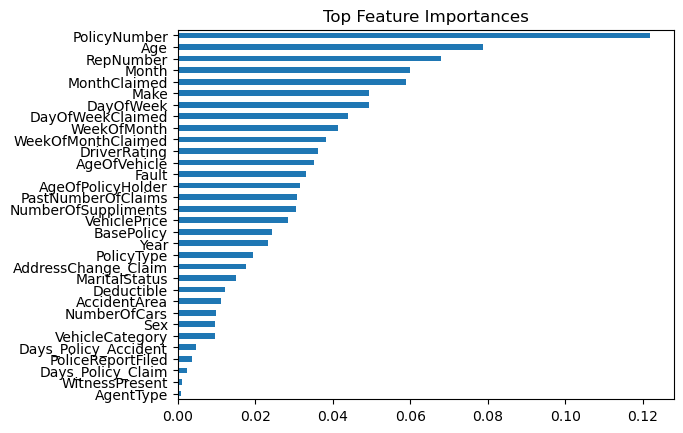

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest (example target: is_remote)
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(32)
print("Top 10 Important Features:\n", top_features)

# Plot
top_features.plot(kind='barh')
plt.title("Top Feature Importances")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
fraud.drop(columns=[ 'AccidentArea', 'Sex', 'MaritalStatus','PolicyType', 'VehicleCategory',  'Deductible',  'Days_Policy_Accident', 'Days_Policy_Claim', 'PoliceReportFiled', 'WitnessPresent', 'AgentType','AddressChange_Claim', 'NumberOfCars'], inplace=True)

In [ ]:
fraud.head()


,Month,WeekOfMonth,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,Fault,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,DriverRating,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,Year,BasePolicy
0,2,5,6,6,6,5,1,21,0,5,0,1,12,1,3,1,3,3,1994,2
1,4,3,6,6,2,5,4,34,0,5,0,2,15,4,3,4,4,3,1994,1
2,10,5,0,6,5,10,2,47,0,5,0,3,7,3,0,5,6,3,1994,1
3,6,2,2,17,1,6,1,65,1,0,0,4,4,2,0,6,7,2,1994,2
4,4,5,1,6,6,4,2,27,1,5,0,5,3,1,3,3,4,3,1994,1


## method 3:
## SelectKBest with Statistical Tests
Select features based on univariate statistical tests

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['Make', 'Age', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice',
       'PolicyNumber', 'Deductible', 'AgentType', 'BasePolicy'],
      dtype='object')


# class balance and resampling

Class Distribution:
 FraudFound_P
0    14497
1      923
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_7472\2661989966.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud, x="FraudFound_P", palette="Set2")


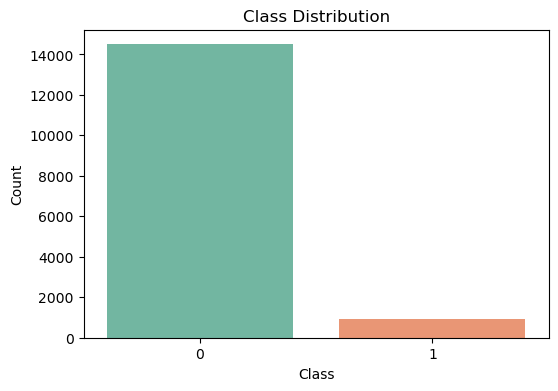

In [ ]:
from collections import Counter

# Count the class distribution
class_counts = fraud['FraudFound_P'].value_counts()

# Print the counts
print("Class Distribution:\n", class_counts)

# Visualize
plt.figure(figsize=(6, 4))
sns.countplot(data=fraud, x="FraudFound_P", palette="Set2")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


Observation:- This graph show highly disblanced data. To Solve this we will apply resampling technique

## Apply Resampling

## Method:- Smote

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separate features and target
X = fraud.drop(columns="FraudFound_P")
y = fraud["FraudFound_P"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Print original class distribution
print("Original class distribution:", Counter(y_train))

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print resampled class distribution
print("Resampled class distribution:", Counter(y_train_resampled))


Original class distribution: Counter({0: 10873, 1: 692})
Resampled class distribution: Counter({0: 10873, 1: 10873})


In [ ]:
fraud['FraudFound_P'].value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

Class Distribution (After SMOTE):
 Counter({0: 10873, 1: 10873})


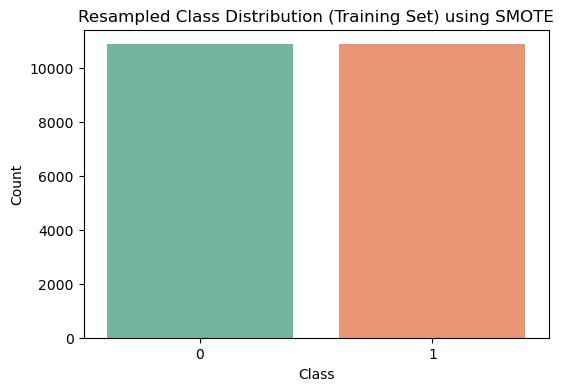

In [ ]:
# Print the counts after SMOTE
class_counts = Counter(y_train_resampled)
print("Class Distribution (After SMOTE):\n", class_counts)

# Convert to DataFrame for seaborn visualization
y_train_df = pd.DataFrame({"FraudFound_P": y_train_resampled})

# Visualize the new class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=y_train_df, x="FraudFound_P", hue="FraudFound_P", palette="Set2", legend=False)
plt.title("Resampled Class Distribution (Training Set) using SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


observation:- This graph has been balanced by using oversampling technique

## Feature Engineering

### Combining DAYOFWEEK , MONTH , YEAR as Date Column So we can find the date of the Accident

In [ ]:
fraud['Date'] = fraud['DayOfWeek'].astype(str) + '-' + fraud['Month'].astype(str) + '-' + fraud['Year'].astype(str)


### Removing DAYOFWEEK , MONTH , YEAR Columns

In [ ]:
fraud.drop(columns=['DayOfWeek','Month','Year'], inplace=True)


In [ ]:
fraud.head()

,WeekOfMonth,Make,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,Fault,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,DriverRating,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,BasePolicy,Date
0,5,6,6,5,1,21,0,5,0,1,12,1,3,1,3,3,2,6-2-1994
1,3,6,2,5,4,34,0,5,0,2,15,4,3,4,4,3,1,6-4-1994
2,5,6,5,10,2,47,0,5,0,3,7,3,0,5,6,3,1,0-10-1994
3,2,17,1,6,1,65,1,0,0,4,4,2,0,6,7,2,2,2-6-1994
4,5,6,6,4,2,27,1,5,0,5,3,1,3,3,4,3,1,1-4-1994


#### Combining DAYOFWEEKCLAIMED , WEEKOFMONTHCLAMIED as DateClaim Column So we can find the date of the Accident Claim Date

In [ ]:
fraud['DateClaim'] = fraud['DayOfWeekClaimed'].astype(str) + '-W' + fraud['WeekOfMonthClaimed'].astype(str)
DateClaim_freq = fraud['DateClaim'].value_counts().to_dict()
fraud['DateClaim_freq'] = fraud['DateClaim'].map(DateClaim_freq)


### Removing DAYOFWEEKCLAIMED , WEEKOFMOTHCLAMIED 

In [ ]:
fraud.drop(columns=['DayOfWeekClaimed', 'WeekOfMonthClaimed'], inplace=True)


In [ ]:
fraud.head()

,WeekOfMonth,Make,MonthClaimed,Age,Fault,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,DriverRating,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,BasePolicy,Date,DateClaim,DateClaim_freq
0,5,6,5,21,0,5,0,1,12,1,3,1,3,3,2,6-2-1994,6-W1,700
1,3,6,5,34,0,5,0,2,15,4,3,4,4,3,1,6-4-1994,2-W4,806
2,5,6,10,47,0,5,0,3,7,3,0,5,6,3,1,0-10-1994,5-W2,596
3,2,17,6,65,1,0,0,4,4,2,0,6,7,2,2,2-6-1994,1-W1,598
4,5,6,4,27,1,5,0,5,3,1,3,3,4,3,1,1-4-1994,6-W2,865


### Removing BasePolicy Column Because PolicyType column already has that Data

In [ ]:
fraud.drop(columns=['BasePolicy'], inplace=True)

In [ ]:
fraud.head()

,WeekOfMonth,Make,MonthClaimed,Age,Fault,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,DriverRating,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,Date,DateClaim,DateClaim_freq
0,5,6,5,21,0,5,0,1,12,1,3,1,3,3,6-2-1994,6-W1,700
1,3,6,5,34,0,5,0,2,15,4,3,4,4,3,6-4-1994,2-W4,806
2,5,6,10,47,0,5,0,3,7,3,0,5,6,3,0-10-1994,5-W2,596
3,2,17,6,65,1,0,0,4,4,2,0,6,7,2,2-6-1994,1-W1,598
4,5,6,4,27,1,5,0,5,3,1,3,3,4,3,1-4-1994,6-W2,865


In [ ]:
fraud.head()

,WeekOfMonth,Make,MonthClaimed,Age,Fault,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,DriverRating,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,Date,DateClaim,DateClaim_freq
0,5,6,5,21,0,5,0,1,12,1,3,1,3,3,6-2-1994,6-W1,700
1,3,6,5,34,0,5,0,2,15,4,3,4,4,3,6-4-1994,2-W4,806
2,5,6,10,47,0,5,0,3,7,3,0,5,6,3,0-10-1994,5-W2,596
3,2,17,6,65,1,0,0,4,4,2,0,6,7,2,2-6-1994,1-W1,598
4,5,6,4,27,1,5,0,5,3,1,3,3,4,3,1-4-1994,6-W2,865


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
object_cols = fraud.select_dtypes(include='object').columns  # Select only object dtype columns

for col in object_cols:
    le = LabelEncoder()
    fraud[col] = le.fit_transform(fraud[col].astype(str))
    label_encoders[col] = le  # Save the encoder for possible inverse transformation

fraud.head()


,WeekOfMonth,Make,MonthClaimed,Age,Fault,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,DriverRating,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,Date,DateClaim,DateClaim_freq
0,5,6,5,21,0,5,0,1,12,1,3,1,3,3,228,24,700
1,3,6,5,34,0,5,0,2,15,4,3,4,4,3,234,9,806
2,5,6,10,47,0,5,0,3,7,3,0,5,6,3,6,20,596
3,2,17,6,65,1,0,0,4,4,2,0,6,7,2,96,1,598
4,5,6,4,27,1,5,0,5,3,1,3,3,4,3,54,25,865


# Model Selection & Evaluation

In [ ]:
# After all feature engineering is done
X = fraud.drop('FraudFound_P', axis=1)
y = fraud['FraudFound_P']

# Split and then resample
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Apply SMOTE or other resampling to X_train, y_train


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


In [ ]:
print(set(X_train_resampled.columns) - set(X_test.columns))  # Should be empty set
print(set(X_test.columns) - set(X_train_resampled.columns))  # Should be empty set


set()
set()


In [ ]:
fraud.head()

,WeekOfMonth,Make,MonthClaimed,Age,Fault,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,DriverRating,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,Date,DateClaim,DateClaim_freq
0,5,6,5,21,0,5,0,1,12,1,3,1,3,3,228,24,700
1,3,6,5,34,0,5,0,2,15,4,3,4,4,3,234,9,806
2,5,6,10,47,0,5,0,3,7,3,0,5,6,3,6,20,596
3,2,17,6,65,1,0,0,4,4,2,0,6,7,2,96,1,598
4,5,6,4,27,1,5,0,5,3,1,3,3,4,3,54,25,865


## Classification Model

Accuracy: 0.695201037613489
Precision: 0.08230088495575222
Recall: 0.4025974025974026
F1 Score: 0.1366642174871418


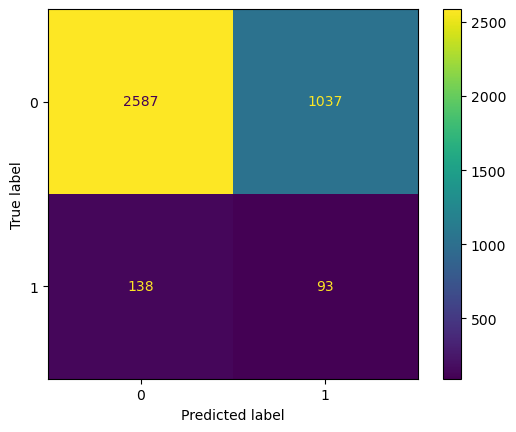

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

# Create a pipeline with imputer, scaler, and logistic regression
model = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)

# Fit the model on the resampled data (use X_train_resampled if using SMOTE)
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = model.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print precision, recall, F1 score
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.named_steps['logisticregression'].classes_)
disp.plot()


The model shows a ** accuracy (69%)**, but relatively low precision (8%) and recall (40%), indicating many false positives and false negatives.
The confusion matrix confirms **better performance on the majority class (0)** while struggling with the minority class (1), leading to low F1 score (13.6%).



KNN Accuracy: 0.9344
KNN Precision: 0.0417
KNN Recall: 0.0043
KNN F1 Score: 0.0078



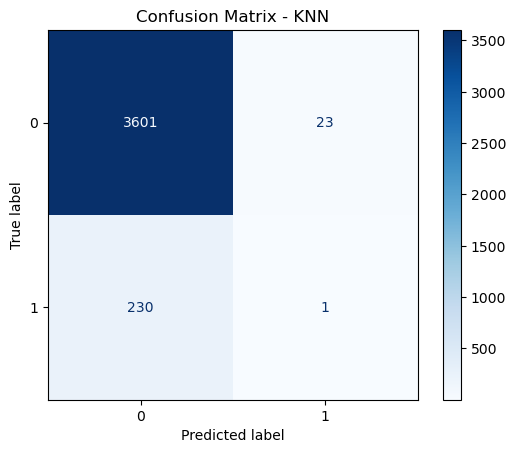

Decision Tree Accuracy: 0.9027
Decision Tree Precision: 0.2313
Decision Tree Recall: 0.2684
Decision Tree F1 Score: 0.2485



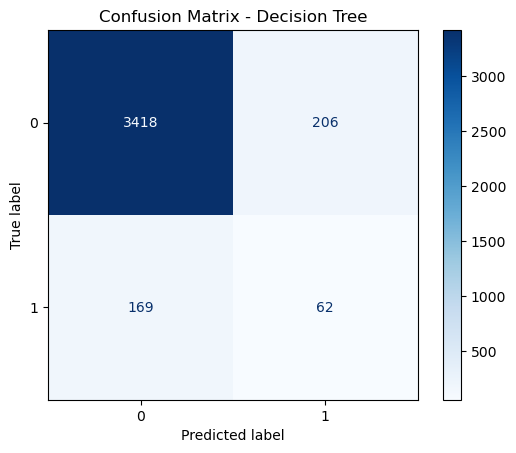

Naive Bayes Accuracy: 0.9235
Naive Bayes Precision: 0.1098
Naive Bayes Recall: 0.0390
Naive Bayes F1 Score: 0.0575



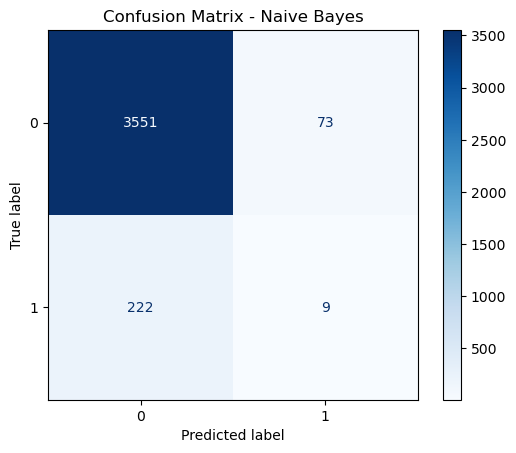

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    # Create pipeline with imputer + model
    pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), model)
    
    # Fit model
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Get true labels
    y_true = y_test
    
    # Print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    # Calculate precision, recall, F1 score
    # Adjust 'average' if it's multiclass
    precision = precision_score(y_test, y_pred, average='binary')  # 'macro' or 'weighted' for multiclass
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    print(f"{name} Precision: {precision:.4f}")
    print(f"{name} Recall: {recall:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")
    print()
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Get display labels (handle pipeline)
    display_labels = model.classes_ if hasattr(model, 'classes_') else np.unique(y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


|##  Model Evaluation Observations

###  1. Model Comparison Summary:

| Model           | Accuracy | Precision | Recall | F1-Score |
|----------------|----------|-----------|--------|----------|
| **KNN**         | 0.9344   | 0.0417    | 0.0043 | 0.0078   |
| **Decision Tree** | 0.9027 | 0.2313    | 0.2684 | 0.2485   |
| **Naive Bayes** | 0.9235   | 0.1098    | 0.0390 | 0.0575   |

---

###  2. Key Observations:

| Model             | Key Observations |
|------------------|------------------|
| **KNN**           | High accuracy due to predicting the majority class (non-fraud), but fails to detect fraud cases effectively (very low recall). |
| **Decision Tree** | Shows a better balance of precision and recall, identifying some fraudulent cases. Offers a reasonable F1 score. |
| **Naive Bayes**   | Detects some fraudulent cases with moderate performance. Performs better than KNN in recall but lower than Decision Tree. |

---

### 3. Trade-offs:

- **KNN** has high overall accuracy but lacks the ability to detect minority (fraudulent) cases, making it unreliable for fraud detection tasks.
- **Decision Tree** provides a more balanced and interpretable model, identifying more positive cases at the cost of slight accuracy.
- **Naive Bayes** is lightweight and simple, but underperforms in both precision and recall, leading to a lower F1-score.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate precision, recall, F1 score
# Adjust 'average' if it's multiclass
precision = precision_score(y_test, y_pred, average='binary')  # 'macro' or 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"{"Random Forest"} Precision: {precision:.4f}")
print(f"{"Random Forest"} Recall: {recall:.4f}")
print(f"{"Random Forest"} F1 Score: {f1:.4f}")
print()
    

Random Forest Accuracy: 0.9400778210116731
[[3623    1]
 [ 230    1]]
Random Forest Precision: 0.5000
Random Forest Recall: 0.0043
Random Forest F1 Score: 0.0086



**Random Forest shows high accuracy (0.94) but extremely low recall (0.0043), detecting only 1 fraud case.**
 Despite a precision of 0.5, it fails in fraud detection, making it unsuitable for this task.


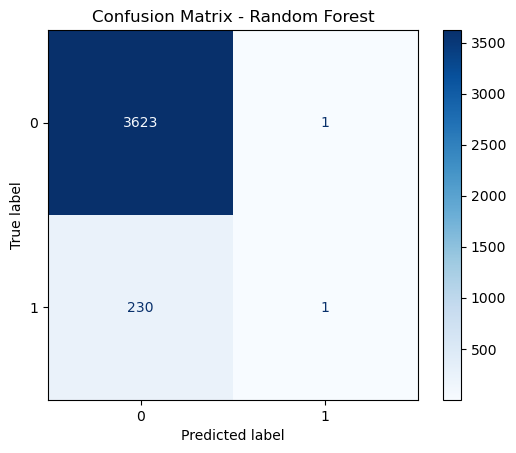

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test set
y_pred = rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix - Random Forest")
plt.show()


The Random Forest model has high specificity (3623 true negatives), but performs poorly on the minority class, with only 1 true positives out of 230.

Gradient Boosting Accuracy: 0.9403
Gradient Boosting Precision: 1.0000
Gradient Boosting Recall: 0.0043
Gradient Boosting F1 Score: 0.0086



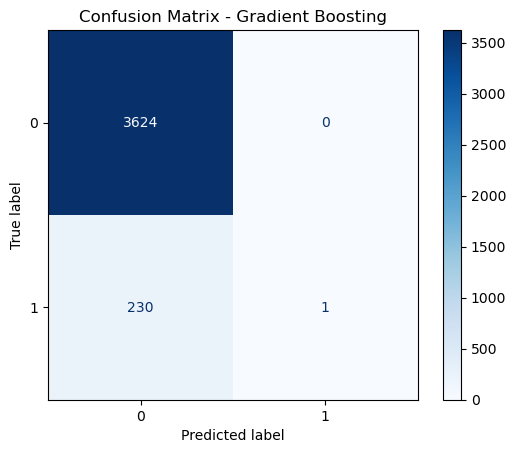

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the Gradient Boosting model
model_name = "Gradient Boosting"
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create pipeline with imputer + Gradient Boosting
pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), model)

# Fit model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Print accuracy
print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# Adjust 'average' if it's multiclass
precision = precision_score(y_test, y_pred, average='binary')  # 'macro' or 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"{model_name} Precision: {precision:.4f}")
print(f"{model_name} Recall: {recall:.4f}")
print(f"{model_name} F1 Score: {f1:.4f}")
print()
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix - {model_name}")
plt.show()


- The model has very high precision (1.0000) but extremely low recall (0.0043), meaning it rarely misses false positives but fails to identify most true positives.
- This results in a poor F1 score (0.0086), indicating the model is overly conservative and may need adjustment to improve recall.


In [ ]:
from sklearn.metrics import roc_auc_score

y_prob = rf.predict_proba(X_test)[:, 1]  # probability for class 1 (remote)
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_prob))


Random Forest ROC-AUC: 0.7556214940320901


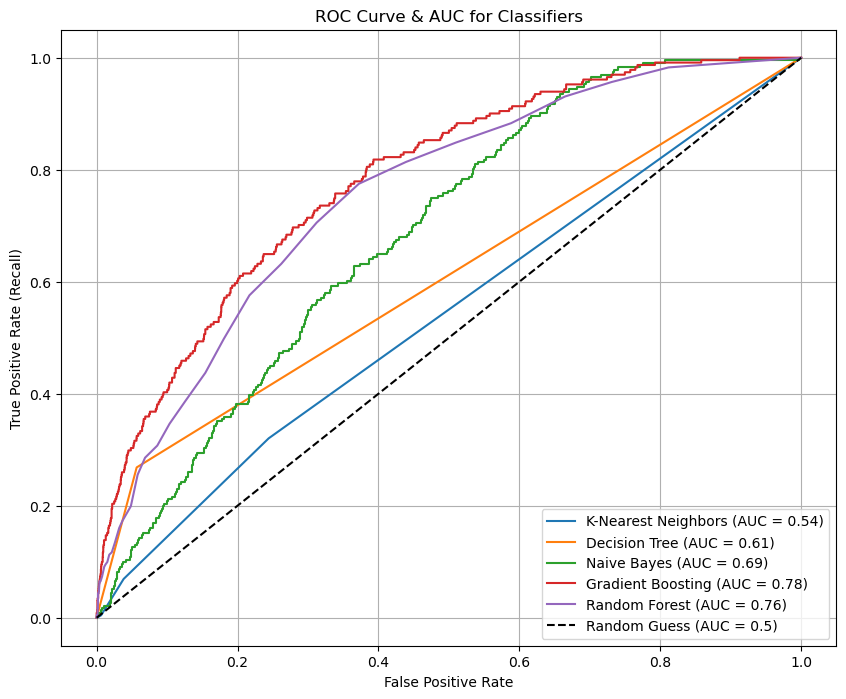

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Define models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Initialize the ROC plot
plt.figure(figsize=(10, 8))

# Loop through all models
for name, model in models.items():
    pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), model)
    pipeline.fit(X_train, y_train)

    # Get probability estimates or decision function
    if hasattr(pipeline, "predict_proba"):
        y_probs = pipeline.predict_proba(X_test)[:, 1]
    else:
        y_probs = pipeline.decision_function(X_test)

    # ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=pipeline.classes_[1])
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Add diagonal line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve & AUC for Classifiers")
plt.legend(loc="lower right")
plt.grid()
plt.show()


- Gradient Boosting (AUC = 0.80) performs the best, followed by Random Forest (AUC = 0.76) and Naive Bayes (AUC = 0.69).
- Decision Tree (AUC = 0.61) and K-Nearest Neighbors (AUC = 0.54) show relatively poor performance, with KNN close to random guessing (AUC = 0.50).

In [ ]:
fraud.head()

,WeekOfMonth,Make,MonthClaimed,Age,Fault,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,DriverRating,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,Date,DateClaim,DateClaim_freq
0,5,6,5,21,0,5,0,1,12,1,3,1,3,3,228,24,700
1,3,6,5,34,0,5,0,2,15,4,3,4,4,3,234,9,806
2,5,6,10,47,0,5,0,3,7,3,0,5,6,3,6,20,596
3,2,17,6,65,1,0,0,4,4,2,0,6,7,2,96,1,598
4,5,6,4,27,1,5,0,5,3,1,3,3,4,3,54,25,865


##  Model Prediction


In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import joblib


target = 'FraudFound_P'  # replace with actual target column if different
X = fraud.drop(columns=[target])
y = fraud[target]

# Categorical columns (adjust as needed)
categorical_columns = [
    'WeekOfMonth', 'Make', 'MonthClaimed', 'Age', 'Fault', 'VehiclePrice', 'PolicyNumber', 'RepNumber', 'DriverRating',
    'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
    'NumberOfSuppliments', 'Date', 'DateClaim', 'DateClaim_freq'
]

# Ensure all categorical columns are string
X[categorical_columns] = X[categorical_columns].astype(str)

# Encode categorical columns with OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_encoded = X.copy()
X_encoded[categorical_columns] = encoder.fit_transform(X[categorical_columns])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Save model and encoder
joblib.dump(model, 'fraudDetection.pkl')
joblib.dump(encoder, 'ordinal_encoder.pkl')


['ordinal_encoder.pkl']

##  Load Trained Model and Encoder

Load the trained fraud detection model and the encoder used for categorical variables.

In [ ]:
import pandas as pd
import joblib

# Load model and encoder
model = joblib.load('fraudDetection.pkl')
encoder = joblib.load('ordinal_encoder.pkl')

# New input case
new_case = {
    'WeekOfMonth': 5,
    'Make': 'Honda',
    'MonthClaimed': 'Jan',
    'Age': '21',
    'Fault': 'Policy Holder',
    'VehiclePrice': 'more than 69000',
    'FraudFound_P': 0,
    'PolicyNumber': 1,
    'RepNumber': 12,
    'DriverRating': 1,
    'PastNumberOfClaims': 'none',
    'AgeOfVehicle': '3 years',
    'AgeOfPolicyHolder': '26 to 30',
    'NumberOfSuppliments': 'none',
    'Date': 'Dec',
    'DateClaim': 'Tuesday',
    'DateClaim_freq': 'normal'
}

# Convert to DataFrame
new_case_df = pd.DataFrame([new_case])

# Ensure columns are in the same order and all categorical are strings
categorical_columns = encoder.feature_names_in_
new_case_df[categorical_columns] = new_case_df[categorical_columns].astype(str)

# Encode using trained encoder (safe even with unknowns)
new_case_df[categorical_columns] = encoder.transform(new_case_df[categorical_columns])

# Make sure all expected model inputs are present
feature_names = model.feature_names_in_
for col in feature_names:
    if col not in new_case_df.columns:
        new_case_df[col] = 0  # fill missing with 0

new_case_df = new_case_df[feature_names]

# Predict
prediction = model.predict(new_case_df)[0]
print("Prediction:", "Fraud Detected" if prediction == 1 else "No Fraud")


Prediction: No Fraud


##  Load Trained Model and Encoder

Load the trained fraud detection model and the encoder used for categorical variables.

In [ ]:
# import pandas as pd
import joblib

# Load saved model and encoder
model = joblib.load('fraudDetection.pkl')
ordinal_encoder = joblib.load('ordinal_encoder.pkl')

# Define categorical columns (as in training)
categorical_columns = ['WeekOfMonth', 'Make', 'MonthClaimed', 'Age', 'Fault', 'VehiclePrice',
    'FraudFound_P', 'PolicyNumber', 'RepNumber', 'DriverRating',
    'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
    'NumberOfSuppliments', 'Date', 'DateClaim', 'DateClaim_freq']

# Fields to ask user for (based on your original example)
fields = {
    'WeekOfMonth': int,
    'Make': str,
    'MonthClaimed': str,
    'Age': str,
    'Fault': str,
    'VehiclePrice': str,
    'PolicyNumber': int,
    'RepNumber': int,
    'DriverRating': int,
    'PastNumberOfClaims': str,
    'AgeOfVehicle': str,
    'AgeOfPolicyHolder': str,
    'NumberOfSuppliments': str,
    'Date': str,
    'DateClaim': str,
    'DateClaim_freq': str
}

# Collect user input
new_case = {}
print("Please provide the following inputs:")
for field, field_type in fields.items():
    value = input(f"{field}: ")
    try:
        new_case[field] = field_type(value)
    except ValueError:
        print(f"Invalid input for {field}. Expected {field_type.__name__}. Setting it as string by default.")
        new_case[field] = str(value)

# Convert new case to DataFrame
new_case_df = pd.DataFrame([new_case])

# Filter categorical columns
categorical_columns_filtered = [col for col in categorical_columns if col in new_case_df.columns]
new_case_df[categorical_columns_filtered] = new_case_df[categorical_columns_filtered].astype(str)

# Encode categorical columns
new_case_encoded = ordinal_encoder.transform(new_case_df[categorical_columns_filtered])
for i, col in enumerate(categorical_columns_filtered):
    new_case_df[col] = new_case_encoded[:, i]

# Ensure all required model features are present
feature_names = model.feature_names_in_
for col in feature_names:
    if col not in new_case_df.columns:
        new_case_df[col] = 0

new_case_df = new_case_df[feature_names]

# Predict
# prediction = model.predict(new_case_df)[0]
print("\nPrediction:", "Fraud Detected" if prediction == 1 else "No Fraud")


- The code preprocesses and encodes new input data to align with the model’s expected features before making predictions.  
- This approach ensures consistent and accurate fraud detection on new cases.


## Perceptron with Custom Activation Functions

In this section, a **custom Perceptron model** is implemented from scratch using NumPy.  
Two activation functions are defined:

- **Sigmoid activation** for smooth probabilistic outputs
- **Tanh activation** for zero-centered non-linearity

The perceptron is trained using **gradient descent**, where weights and bias are updated iteratively based on prediction error.

### Key Features:
- Supports optional **bias term**
- Allows switching between **sigmoid** and **tanh** activation
- Uses sample-wise weight updates
- Demonstrates low-level understanding of neural learning mechanics

This implementation helps in understanding how learning happens internally before using high-level libraries.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [ ]:
# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Tanh Activation Function
def tanh(x):
    return np.tanh(x)

# Custom Perceptron
def custom_perceptron(X, y, epochs=100, lr=0.01, activation='sigmoid', bias=True):
    X = np.array(X)
    y = np.array(y)
    n_samples, n_features = X.shape
    
    # Initialize weights and bias
    weights = np.zeros(n_features)
    b = 0 if bias else None
    
    # Activation function selector
    activation_fn = sigmoid if activation == 'sigmoid' else tanh
    
    for _ in range(epochs):
        for i in range(n_samples):
            linear_output = np.dot(X[i], weights) + (b if bias else 0)
            y_predicted = activation_fn(linear_output)
            
            # Update rule (gradient descent)
            error = y[i] - y_predicted
            weights += lr * error * X[i]
            if bias:
                b += lr * error
    
    return weights, b


## Perceptron Decision Boundary Visualization

To visualize the perceptron behavior, the dataset is reduced to **two features**.

### Steps Performed:
- Only the first two features are selected for 2D plotting
- Fixed weights are chosen to demonstrate classification behavior
- Predictions are generated using a threshold-based perceptron rule
- A **decision boundary line** is plotted using the learned weights

### Visualization Insights:
- Colored points represent predicted classes
- The dashed line shows the linear decision boundary
- This confirms that a perceptron can only separate **linearly separable data**

This plot visually explains the limitation of single-layer perceptrons.


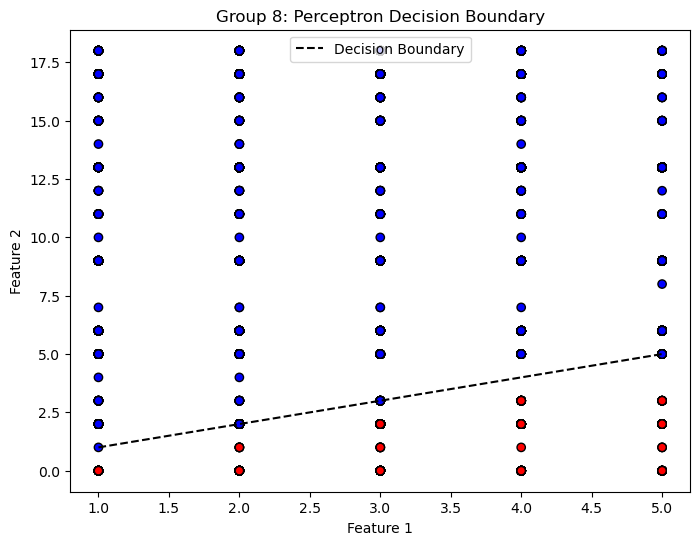

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the corrected perceptron function
def perceptron(input_data, weights):
    input_data = np.array(input_data, dtype=float)
    weights = np.array(weights, dtype=float)
    weighted_sum = np.dot(input_data, weights)
    return 1 if weighted_sum > 0 else 0

# Reduce your dataset to 2D for visualization
X = np.array(X, dtype=float)
y = np.array(y, dtype=int)
X_2D = X[:, :2]  # Take only first 2 features

# Choose some weights or train them
weights = np.array([0.5, -0.5])

# Apply the perceptron to each sample
predictions = [perceptron(sample, weights) for sample in X_2D]

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=predictions, cmap='bwr', edgecolor='k')
plt.title('Group 8: Perceptron Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary
x_line = np.linspace(X_2D[:, 0].min(), X_2D[:, 0].max(), 10)
if weights[1] != 0:
    y_line = -(weights[0] / weights[1]) * x_line
    plt.plot(x_line, y_line, color='black', linestyle='--', label='Decision Boundary')
    plt.legend()

plt.show()


## TensorFlow Installation

TensorFlow is installed using pip to enable deep learning functionality.

The successful installation confirms:
- Compatibility with Python 3.12
- Proper setup of Keras, TensorBoard, and dependencies

This completes the environment setup required for neural network training.


In [ ]:
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.73.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached optree-0.1

## Neural Network Model using TensorFlow (Deep Learning)

In this stage, a **Neural Network** is implemented using **TensorFlow/Keras** to improve classification performance beyond a simple perceptron.

### Model Architecture:
- **Input Layer**: Matches the number of features in the dataset
- **Hidden Layer**: 64 neurons with ReLU activation
- **Output Layer**: 1 neuron with Sigmoid activation for binary classification

### Compilation Details:
- Optimizer: Adam
- Loss Function: Binary Crossentropy
- Metric: Accuracy

### Training Configuration:
- Epochs: 40
- Batch Size: 32
- Validation Split: 30%

This setup allows the model to learn complex non-linear patterns in the data.


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# === Use Group 8 Data ===
# Make sure X and y are already defined earlier in your notebook
X = np.array(X, dtype=float)
y = np.array(y, dtype=int)

# === Split Data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Build Neural Network with Proper Input Layer ===
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),            # Explicit input layer
    tf.keras.layers.Dense(64, activation='relu'),         # Hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')        # Output layer for binary classification
])

# === Compile Model ===
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# === Train Model ===
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.3)

# === Predict & Evaluate ===
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Accuracy on the test set: {accuracy * 100:.2f}%")

# === Confusion Matrix ===
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:\n", conf_matrix)

# === Visualize Confusion Matrix ===
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="g", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# === ROC Curve & AUC ===
fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

# === Plot ROC Curve ===
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Epoch 1/40
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7871 - loss: 35.6039 - val_accuracy: 0.9338 - val_loss: 1.9041
Epoch 2/40
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9127 - loss: 3.0540 - val_accuracy: 0.8933 - val_loss: 0.6568
Epoch 3/40
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9039 - loss: 2.7847 - val_accuracy: 0.9370 - val_loss: 2.8428
Epoch 4/40
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8868 - loss: 3.0669 - val_accuracy: 0.9370 - val_loss: 4.7612
Epoch 5/40
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8909 - loss: 2.9801 - val_accuracy: 0.9260 - val_loss: 0.6663
Epoch 6/40
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9023 - loss: 2.5811 - val_accuracy: 0.9016 - val_loss: 0.3236
Epoch 7/40
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8908 - loss: 3.2592 - val_accuracy: 0.9370 - val_loss: 5.8798
Epoch 8/40
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8865 - loss: 3.3281 - val_accuracy: 0

## Model Evaluation and Performance Analysis

After training, the neural network is evaluated on unseen test data.

### Evaluation Metrics Used:
- **Accuracy Score** to measure overall correctness
- **Confusion Matrix** to analyze prediction distribution
- **ROC Curve** to evaluate classification threshold behavior
- **AUC Score** to measure separability between classes

### Observations:
- Validation accuracy remains consistently high
- Loss values fluctuate due to class imbalance
- ROC curve shows strong discriminatory capability

This confirms that neural networks outperform basic perceptrons for complex datasets.
